# Обучение без учителя в Scikit-learn

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100, max_iter=100)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

feature_num_names = X_train.select_dtypes(include='float64').columns.tolist()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[feature_num_names]),
                              columns=feature_num_names, index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test[feature_num_names]),
                             columns=feature_num_names, index=X_test.index)

Итак, перейдём к кластеризации. С помощью метода `.fit_predict` можно обучить модель, а затем сразу же получить метки кластеров на входных данных:

In [9]:
train_labels = model.fit_predict(X_train_scaled)

print(train_labels)

[0 2 1 0 2 2 2 1 0 0 2 2 2 0 2 2 2 1 2 1 0 2 1 2 1 2 0 1 2 1 2 2 0 0 2 1 1
 2 2 1 1 2 0 2 0 0 2 2 0 0 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2
 2 2 1 2 0 0 0 0 1 2 0 0 0 1 0 2 2 0 0 1 1 2 0 0 2 0 2 1 1 1 2 2 1 2 2 2 0
 1 2 1 1 0 0 0 2 2 2 0 0 2 1 0 0 1 1 0 1 2 2 2 2 0 2 1 2 0 2 0 2 2 2 0 2 2
 2 2 2 0 1 2 1 0 0 0 0 0 1 2 0 2 0 1 1 2 1 2 2 1 1 0 1 1 0 0 1 2 2 2 0 2 0
 0 1 1 0 0 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 1 2 2 2 2 1 2 0 2 0 1 0 2 0 0 0
 0 2 2 1 1 2 1 2 0 2 2 2 2 2 0 0 1 2 2 1 1 0 0 2 1 0 0 2 1 1 0 2 1 0 2 2 0
 2 0 2 2 1 2 2 2 2 2 2 1 0 2 0 2 2 1 2 0 0 1 0 2 0 2 2 0 1 1 2 0 1 0 0 0 2
 1 0 2 2 2 2 2 2 0 1 2 0 1 1 2 1 2 1 2 0 1 2 2 2 1 0 2 0 0 2 0 1 2 2 0 2 0
 0 2 2 0 1 2 2 1 2 2 2 0 2 2 2 2 0 2 0 2 1 1 0 1 0 2 0 1 2 0 1 2 1 2 1 2 1
 2 2 0 2 1 0 1 0 2 0 1 2 2 0 2 0 0 2 0 2 0 2 2 0 2 2 2 1 2 2 2 1 0 2]


Итак, перейдём к использованию t-SNE. Зададим параметр `n_components=2`, чтобы получить данные с двумя признаками. Параметр `learning_rate` влияет на то, как плотно будут располагаться точки. Рекомендуется задавать его в диапазоне от 10 до 1000.

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Мы видим, что число признаков уменьшилось с 13 до 2. Теперь можно визуализировать наши данные на плоскости.

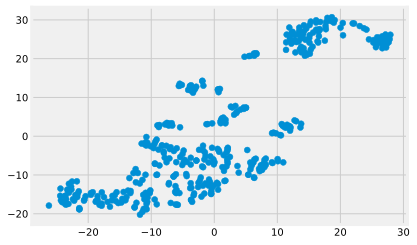

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

По графику видно, что данные можно разбить как минимум на 2 кластера. Попробуем сделать это с помощью уже известного нам метода K-means и ещё раз построим график, но уже с полученными метками кластеров.

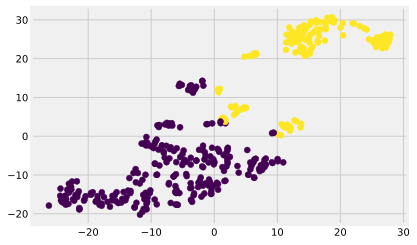

In [18]:
kmeans = KMeans(n_clusters=2)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Как мы видим, при кластеризации мы получили практически такое же разбиение, как то, которое можно было наблюдать в результате t-SNE.

Для тестовой выборки получить аналогичный график нам не удастся, поскольку у алгоритма t-SNE нет метода `.transform`. Однако, с помощью алгоритма K-means мы можем получить метки кластеров для тестовой выборки с помощью метода `.predict` и использовать их:

In [ ]:
labels_test = kmeans.predict(X_test_scaled)

Давайте посмотрим на объекты из разных кластеров, чтобы попытаться понять, почему алгоритм t-SNE выделил две группы. Например, посмотрим на среднюю цену недвижимости во всей выборке и в отдельных кластерах.

In [20]:
y_train.mean()

price    22.796535
dtype: float64

In [21]:
y_train[labels_train == 0].mean()

price    26.066541
dtype: float64

In [22]:
y_train[labels_train == 1].mean()

price    16.493478
dtype: float64

In [ ]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

Гистограмма также отражает замеченную закономерность. Заметим, что мы не использовали цену на недвижимость ни при использовании t-SNE, ни при использовании K-means.

Посмотрим теперь на распределение отдельных признаков внутри кластеров. Например, `'RM'` - количество комнат.

In [43]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'RM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'RM'].mean()))

Кластер 0: 6.44851724137931
Кластер 1: 5.9092868852459


Значения не сильно отличаются. Не похоже, что этот признак внёс какой-то вклад в разбиение. Рассмотрим другой признак - `'CRIM'`. Он отражает криминальность места, в котором расположена недвижимость (количество преступлений на душу населения).

In [44]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))

Кластер 0: 0.2679815948275862
Кластер 1: 9.056794180327868


Видно, что данное значение сильно выше для второго кластера. Рассмотрим гистограммы распределений значений этого признака по кластерам.

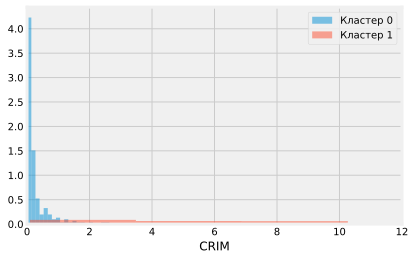

In [45]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM')

plt.show()

В кластере 0 максимальная плотность этого признака расположена возле 0. Для кластера 1 значения этого признака более разнообразны.

Ещё один интересный признак - концентрация оксида азота в воздухе (`'NOX'`). Построим гистограммы распределения этого признака.

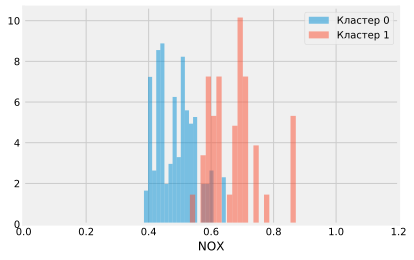

In [46]:
plt.hist(X_train.loc[labels_train == 0, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'NOX'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX')

plt.show()

Вновь кластер 1 в этом плане отличается в худшую сторону. 

Итак, как нам теперь использовать полученную информацию? Мы можем, например, попробовать построить отдельную модель для каждого кластера. Сначала построим модель на всех данных. Для оценки качества модели будем использовать `r2_score`.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.6508417720329543

Итак, мы получили базовое значение. Построим теперь разные модели для объектов разных кластеров и посмотрим, какое качество мы сможем получить на них.

Модель для кластера 0:

In [48]:
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.8316034335298439

Модель для кластера 1:

In [49]:
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.6458127429551195

Для кластера 0 мы получили большее значение `r2_score`, однако, сравнивать эти модели пока рано, потому что данное значение получено не на всех данных. Соберём теперь данные по кусочкам и проверим значение `r2_score`.

In [50]:
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1]])
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

r2_score(y_test_all, y_test_pred_all)

0.8055877528812476

Итак, теперь можно утверждать, что мы получили значительно более высокий показатель `r2_score`, применив информацию, полученную с помощью t-SNE и K-means.